In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [46]:
%pip install forex-python


[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



     -------------------------------------- 75.4/75.4 kB 835.9 kB/s eta 0:00:00


In [2]:
#Interval required 5 minutes
#Nikkei
nik = yf.download(tickers='^N225', period='1y', interval='1d')
#S&P 500
snp = yf.download(tickers='^GSPC', period='1y', interval='1d')
# DOW Jones
dow = yf.download(tickers='^DJI', period='1y', interval='1d')
#NASDAQ
nas = yf.download(tickers='^IXIC', period='1y', interval='1d')
#NIFTY 50 (Indian Mutual Fund)
nif = yf.download(tickers='^NSEI', period='1y', interval='1d')
#Print data
snp


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-13,3779.669922,3829.439941,3759.070068,3801.780029,3801.780029,4109390000
2022-07-14,3763.989990,3796.409912,3721.560059,3790.379883,3790.379883,4199690000
2022-07-15,3818.000000,3863.620117,3817.179932,3863.159912,3863.159912,4143800000
2022-07-18,3883.790039,3902.439941,3818.629883,3830.850098,3830.850098,4046870000
2022-07-19,3860.729980,3939.810059,3860.729980,3936.689941,3936.689941,4041070000
...,...,...,...,...,...,...
2023-07-06,4422.620117,4422.620117,4385.049805,4411.589844,4411.589844,3682020000
2023-07-07,4404.540039,4440.390137,4397.399902,4398.950195,4398.950195,3630480000
2023-07-10,4394.229980,4412.600098,4389.919922,4409.529785,4409.529785,3429600000


"Open": This column shows the opening price of the stock at the beginning of each time interval.
"High": This column indicates the highest price reached by the stock during each time interval.
"Low": This column represents the lowest price reached by the stock during each time interval.
"Close": This column shows the closing price of the stock at the end of each time interval.
"Adj Close": This column represents the adjusted closing price of the stock, which takes into account any corporate actions or events affecting the stock's price.
"Volume": This column indicates the trading volume, i.e., the total number of shares or contracts traded during each time interval.

In [3]:
nik.reset_index(inplace=True)
snp.reset_index(inplace=True)
dow.reset_index(inplace=True)
nas.reset_index(inplace=True)
nif.reset_index(inplace=True)
nik

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-07-12,26701.000000,26718.669922,26278.279297,26336.660156,26336.660156,64400000
1,2022-07-13,26403.789062,26543.070312,26389.099609,26478.769531,26478.769531,54100000
2,2022-07-14,26357.320312,26713.070312,26312.789062,26643.390625,26643.390625,60600000
3,2022-07-15,26736.080078,26857.769531,26571.380859,26788.470703,26788.470703,65500000
4,2022-07-19,27003.830078,27043.580078,26791.710938,26961.679688,26961.679688,59400000
...,...,...,...,...,...,...,...
242,2023-07-06,33058.398438,33079.449219,32637.720703,32773.019531,32773.019531,100600000
243,2023-07-07,32450.640625,32730.250000,32327.900391,32388.419922,32388.419922,105100000
244,2023-07-10,32393.460938,32558.980469,32065.630859,32189.730469,32189.730469,101200000
245,2023-07-11,32434.669922,32468.699219,32084.419922,32203.570312,32203.570312,87200000


In [4]:
import pytz
from forex_python.converter import CurrencyRates

In [5]:
nik['Date'] = pd.to_datetime(nik['Date'])

source_tz = pytz.timezone('Asia/Tokyo')  # Assuming the source time zone is Asia/Tokyo (+09:00)
target_tz = pytz.timezone('US/Pacific')  # Target time zone is US/Pacific (PST)

# Convert the datetime column to Pacific Standard Time
nik['Date'] = nik['Date'].dt.tz_localize(source_tz).dt.tz_convert(target_tz)
#nik['Date'] = nik['Date'].dt.tz_convert(target_tz)
# Convert JPY to USD using exchange rate data
#c = CurrencyRates()
#exchange_rate1 = c.get_rate('JPY', 'USD')
#exchange_rate1 = c.get_rate('', 'USD')

# Convert prices to USD
#nik['NIKKEI 225'] = nik['NIKKEI 225'] * exchange_rate


nik


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-07-11 08:00:00-07:00,26701.000000,26718.669922,26278.279297,26336.660156,26336.660156,64400000
1,2022-07-12 08:00:00-07:00,26403.789062,26543.070312,26389.099609,26478.769531,26478.769531,54100000
2,2022-07-13 08:00:00-07:00,26357.320312,26713.070312,26312.789062,26643.390625,26643.390625,60600000
3,2022-07-14 08:00:00-07:00,26736.080078,26857.769531,26571.380859,26788.470703,26788.470703,65500000
4,2022-07-18 08:00:00-07:00,27003.830078,27043.580078,26791.710938,26961.679688,26961.679688,59400000
...,...,...,...,...,...,...,...
242,2023-07-05 08:00:00-07:00,33058.398438,33079.449219,32637.720703,32773.019531,32773.019531,100600000
243,2023-07-06 08:00:00-07:00,32450.640625,32730.250000,32327.900391,32388.419922,32388.419922,105100000
244,2023-07-09 08:00:00-07:00,32393.460938,32558.980469,32065.630859,32189.730469,32189.730469,101200000
245,2023-07-10 08:00:00-07:00,32434.669922,32468.699219,32084.419922,32203.570312,32203.570312,87200000


In [6]:
print(nif["Close"])
import matplotlib.dates as mdates

0      16058.299805
1      15966.650391
2      15938.650391
3      16049.200195
4      16278.500000
           ...     
243    19497.300781
244    19331.800781
245    19355.900391
246    19439.400391
247    19384.300781
Name: Close, Length: 248, dtype: float64


DatetimeIndex([          '1970-01-01 00:00:00',
               '1970-01-01 00:00:00.000000001',
               '1970-01-01 00:00:00.000000002',
               '1970-01-01 00:00:00.000000003',
               '1970-01-01 00:00:00.000000004',
               '1970-01-01 00:00:00.000000005',
               '1970-01-01 00:00:00.000000006',
               '1970-01-01 00:00:00.000000007',
               '1970-01-01 00:00:00.000000008',
               '1970-01-01 00:00:00.000000009',
               ...
               '1970-01-01 00:00:00.000000241',
               '1970-01-01 00:00:00.000000242',
               '1970-01-01 00:00:00.000000243',
               '1970-01-01 00:00:00.000000244',
               '1970-01-01 00:00:00.000000245',
               '1970-01-01 00:00:00.000000246',
               '1970-01-01 00:00:00.000000247',
               '1970-01-01 00:00:00.000000248',
               '1970-01-01 00:00:00.000000249',
               '1970-01-01 00:00:00.000000250'],
              dtype=

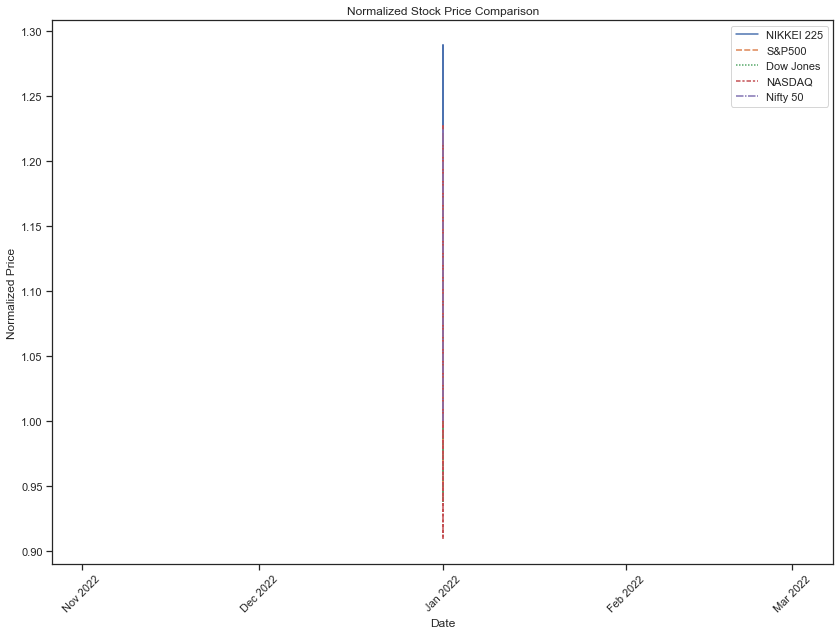

In [76]:
combined_data = pd.concat([nik['Close'], snp['Close'], dow['Close'], nas['Close'], nif['Close']], axis=1)
combined_data.columns = ['NIKKEI 225', 'S&P500', 'Dow Jones', 'NASDAQ', 'Nifty 50']

#combined_data.index = pd.to_datetime(combined_data.index)  # Convert index to datetime
combined_data.index = pd.to_datetime(combined_data.index)  # Convert index to datetime
print(combined_data.index)
normalized_df = combined_data / combined_data.iloc[0]

plt.figure(figsize=(14, 10))
sns.lineplot(data=normalized_df)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b 2022'))

plt.title('Normalized Stock Price Comparison')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend(normalized_df.columns)
plt.xticks(rotation=45)
plt.show()


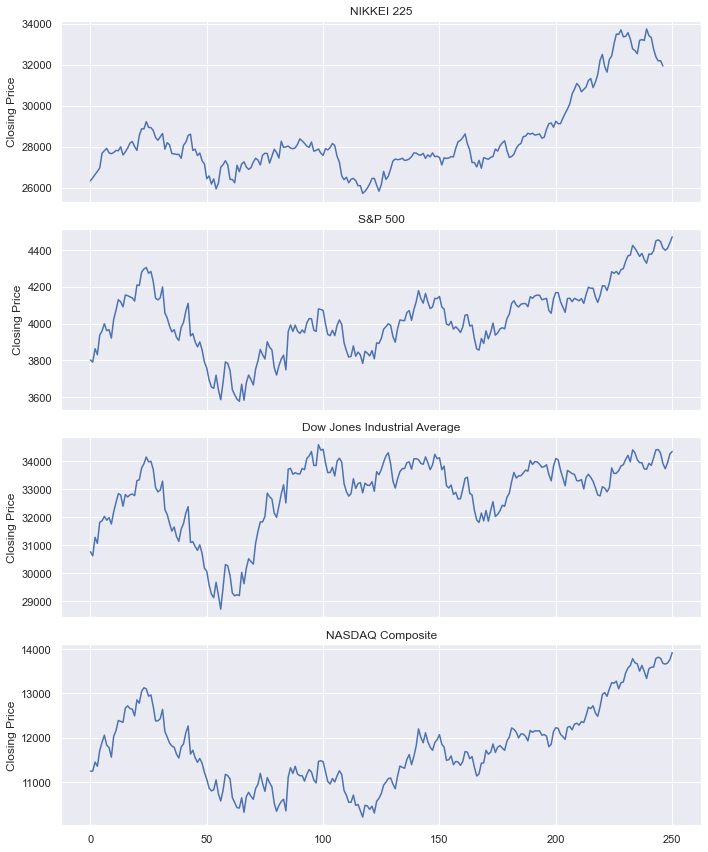

In [7]:
# Assuming you have already retrieved the necessary data and stored it in variables

# Creating a figure with subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 12), sharex=True)

# Plotting each line on a separate subplot
sns.lineplot(ax=axes[0], x=nik.index, y=nik['Close'])
sns.lineplot(ax=axes[1], x=snp.index, y=snp['Close'])
sns.lineplot(ax=axes[2], x=dow.index, y=dow['Close'])
sns.lineplot(ax=axes[3], x=nas.index, y=nas['Close'])

# Setting titles and labels for each subplot
axes[0].set_title('NIKKEI 225')
axes[1].set_title('S&P 500')
axes[2].set_title('Dow Jones Industrial Average')
axes[3].set_title('NASDAQ Composite')

for ax in axes:
    ax.set_ylabel('Closing Price')

# Adjusting subplot spacing
plt.tight_layout()

# Displaying the plot
plt.show()


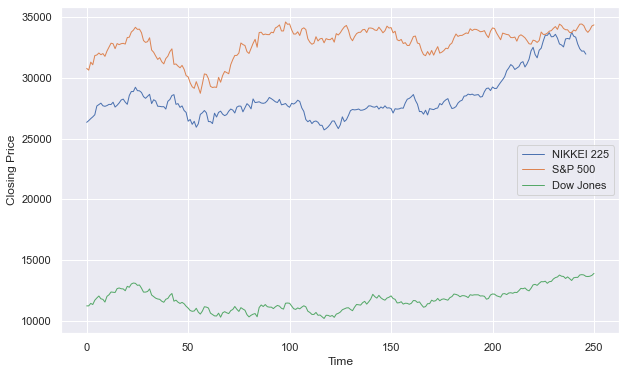

In [8]:
# Assuming you have already retrieved the necessary data and stored it in variables

# Creating a single plot
plt.figure(figsize=(10, 6))

# Plotting each line on the same plot without a shared y-scale
sns.lineplot(data=nik['Close'], linewidth=1)
#sns.lineplot(data=snp['Close'], linewidth=1)
sns.lineplot(data=dow['Close'], linewidth=1)
sns.lineplot(data=nas['Close'], linewidth=1)

# Setting the legend and labels
plt.legend(['NIKKEI 225', 'S&P 500', 'Dow Jones', 'NASDAQ Composite'])
plt.xlabel('Time')
plt.ylabel('Closing Price')

# Displaying the plot
plt.show()


[*********************100%***********************]  4 of 4 completed


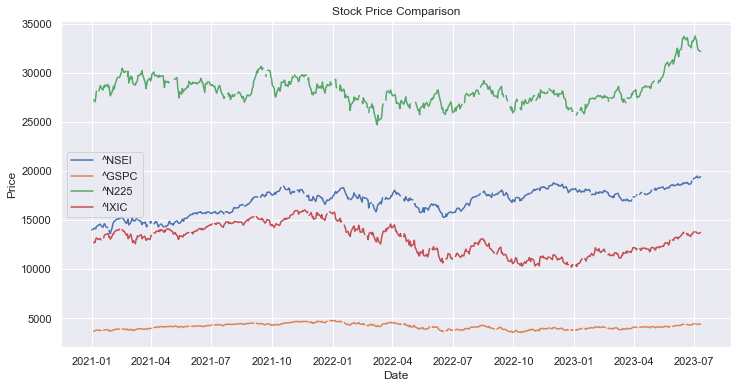

In [10]:
# Define the ticker symbols for the indices
tickers = ['^NSEI', '^GSPC', '^N225', '^IXIC']

# Fetch historical stock price data
data = yf.download(tickers, start='2021-01-01', end='2023-07-12')

# Select the 'Close' price for each index
close_prices = data['Close']

# Plot the stock price data
plt.figure(figsize=(12, 6))

for ticker in tickers:
    plt.plot(close_prices[ticker], label=ticker)

plt.title('Stock Price Comparison')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%***********************]  3 of 3 completed


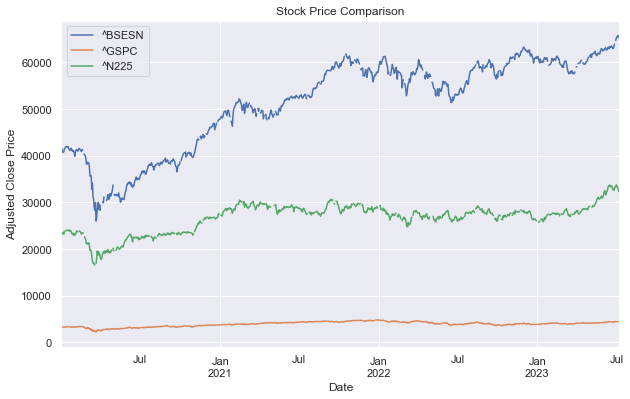

In [12]:
tickers = ["^BSESN", "^GSPC", "^N225"]
data = yf.download(tickers, start="2020-01-01", end="2023-07-11")
prices = data["Adj Close"]
prices.plot(figsize=(10, 6))
plt.title("Stock Price Comparison")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.legend(tickers)
plt.show()


[*********************100%***********************]  3 of 3 completed


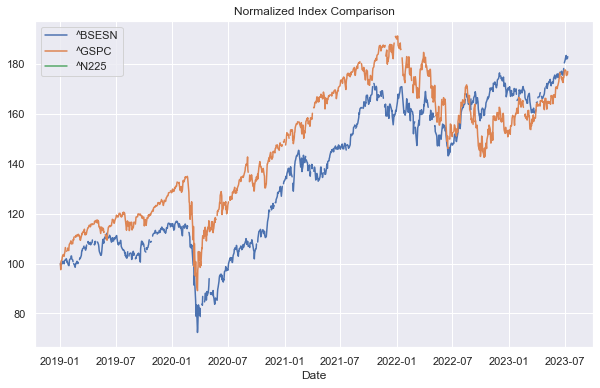

In [3]:

tickers = ['^BSESN', '^GSPC', '^N225']  # Updated ticker symbols for Sensex, S&P 500, and Nikkei
data = yf.download(tickers, start='2019-01-01', end='2023-07-12')['Adj Close']

# Normalize the data
normalized_data = data.div(data.iloc[0]) * 100

plt.figure(figsize=(10, 6))
for ticker in tickers:
    plt.plot(normalized_data.index, normalized_data[ticker], label=ticker)

plt.title('Normalized Index Comparison')
plt.xlabel('Date')
plt.legend()
plt.show()



[*********************100%***********************]  3 of 3 completed


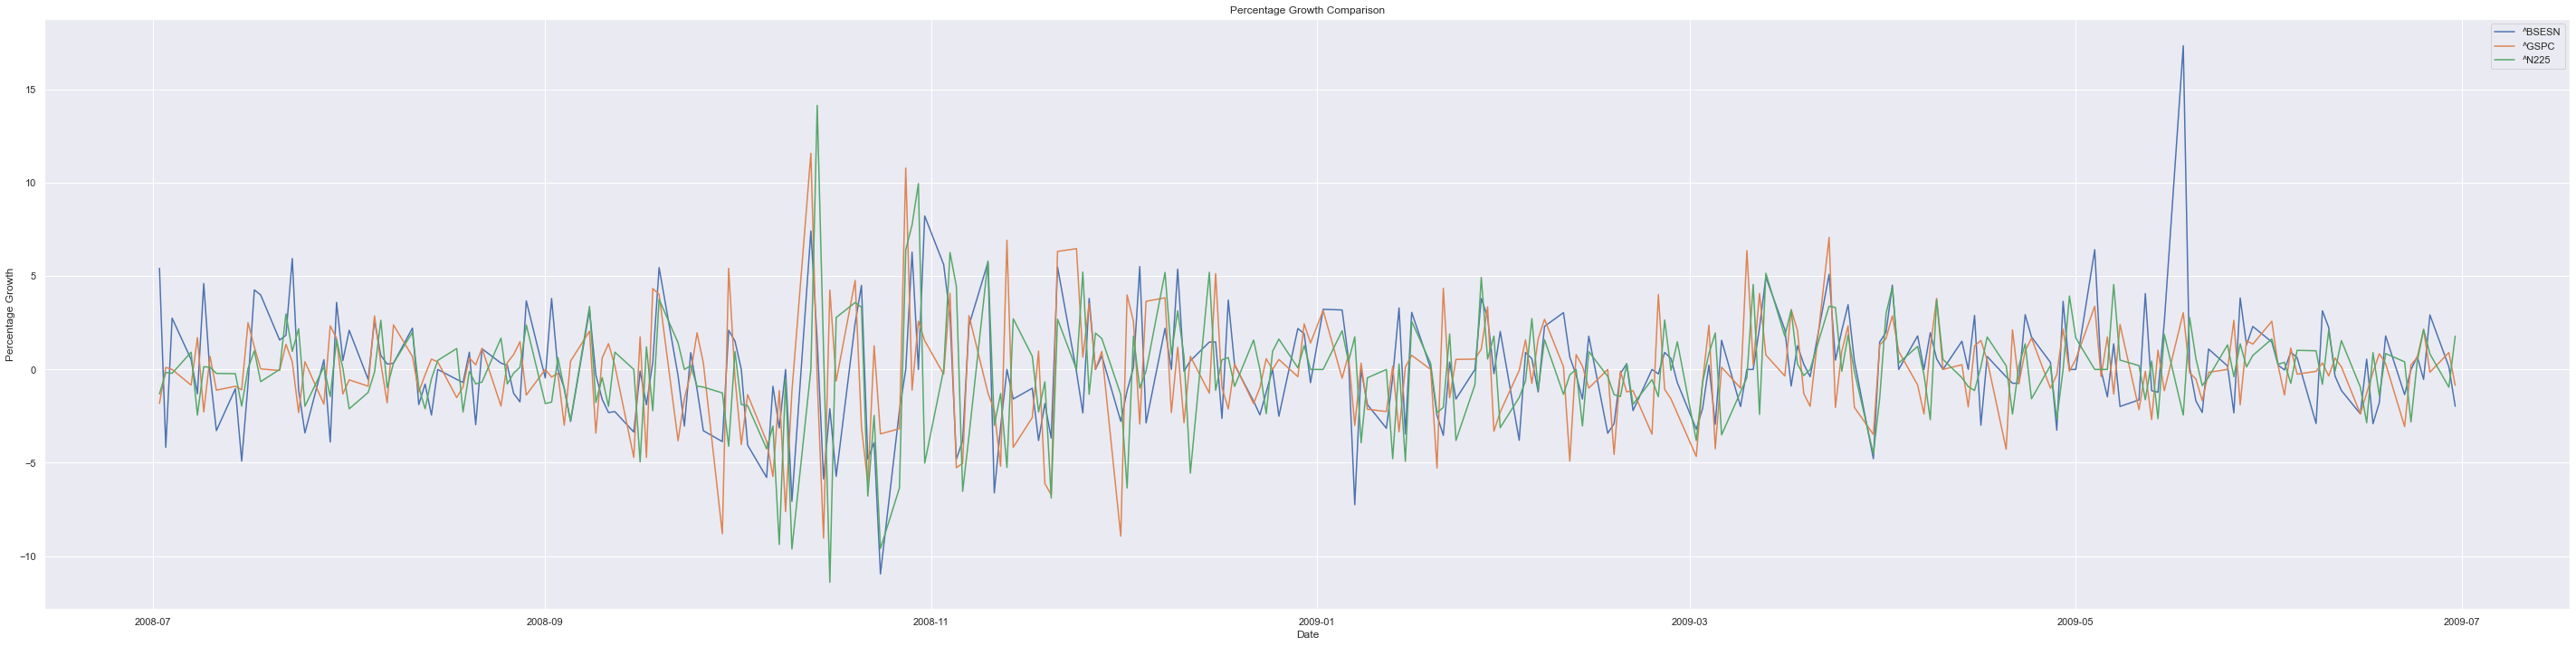

In [5]:
tickers = ['^BSESN', '^GSPC', '^N225']  # Updated ticker symbols for Sensex, S&P 500, and Nikkei
data = yf.download(tickers, start='2008-07-01', end='2009-07-01')['Adj Close']

# Calculate percentage growth
percentage_growth = data.pct_change() * 100

plt.figure(figsize=(50, 12))
for ticker in tickers:
    plt.plot(percentage_growth.index, percentage_growth[ticker], label=ticker)

plt.title('Percentage Growth Comparison')
plt.xlabel('Date')
plt.ylabel('Percentage Growth')
plt.legend()
plt.show()


[*********************100%***********************]  3 of 3 completed


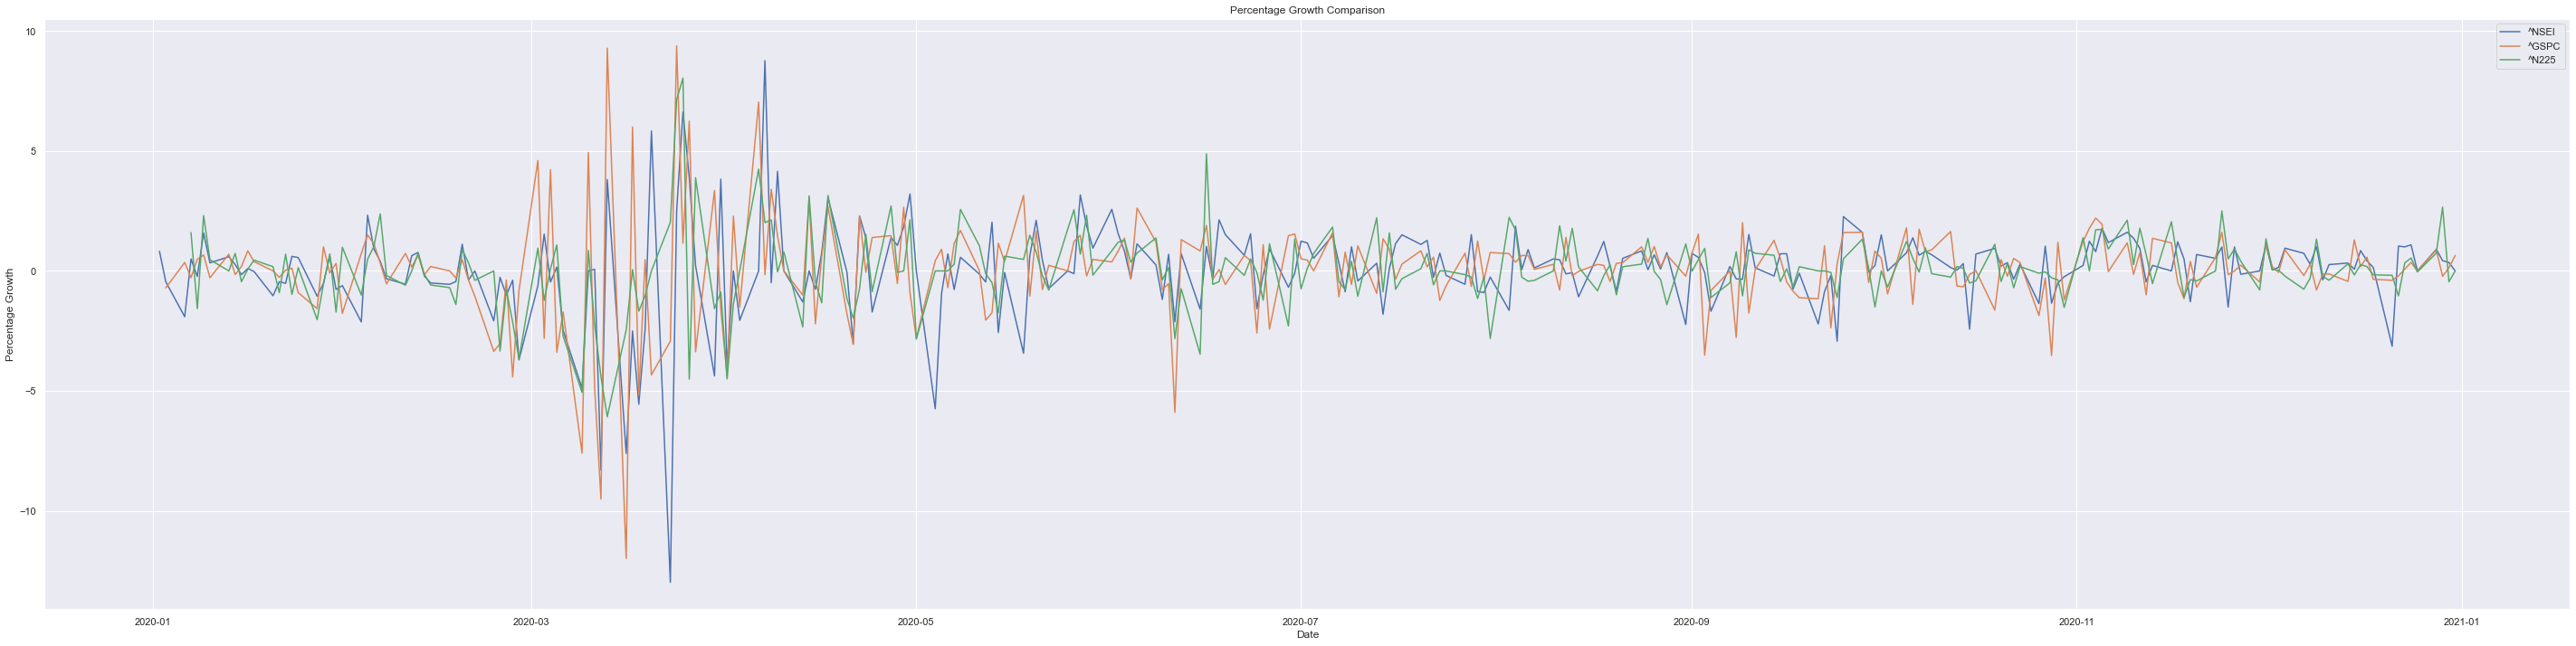

In [3]:
tickers = ['^NSEI', '^GSPC', '^N225']  # Updated ticker symbols for Sensex, S&P 500, and Nikkei
data = yf.download(tickers, start='2020-01-01', end='2021-01-01')['Adj Close']

# Calculate percentage growth
percentage_growth = data.pct_change() * 100

plt.figure(figsize=(50, 12))
for ticker in tickers:
    plt.plot(percentage_growth.index, percentage_growth[ticker], label=ticker)

plt.title('Percentage Growth Comparison')
plt.xlabel('Date')
plt.ylabel('Percentage Growth')
plt.legend()
plt.show()

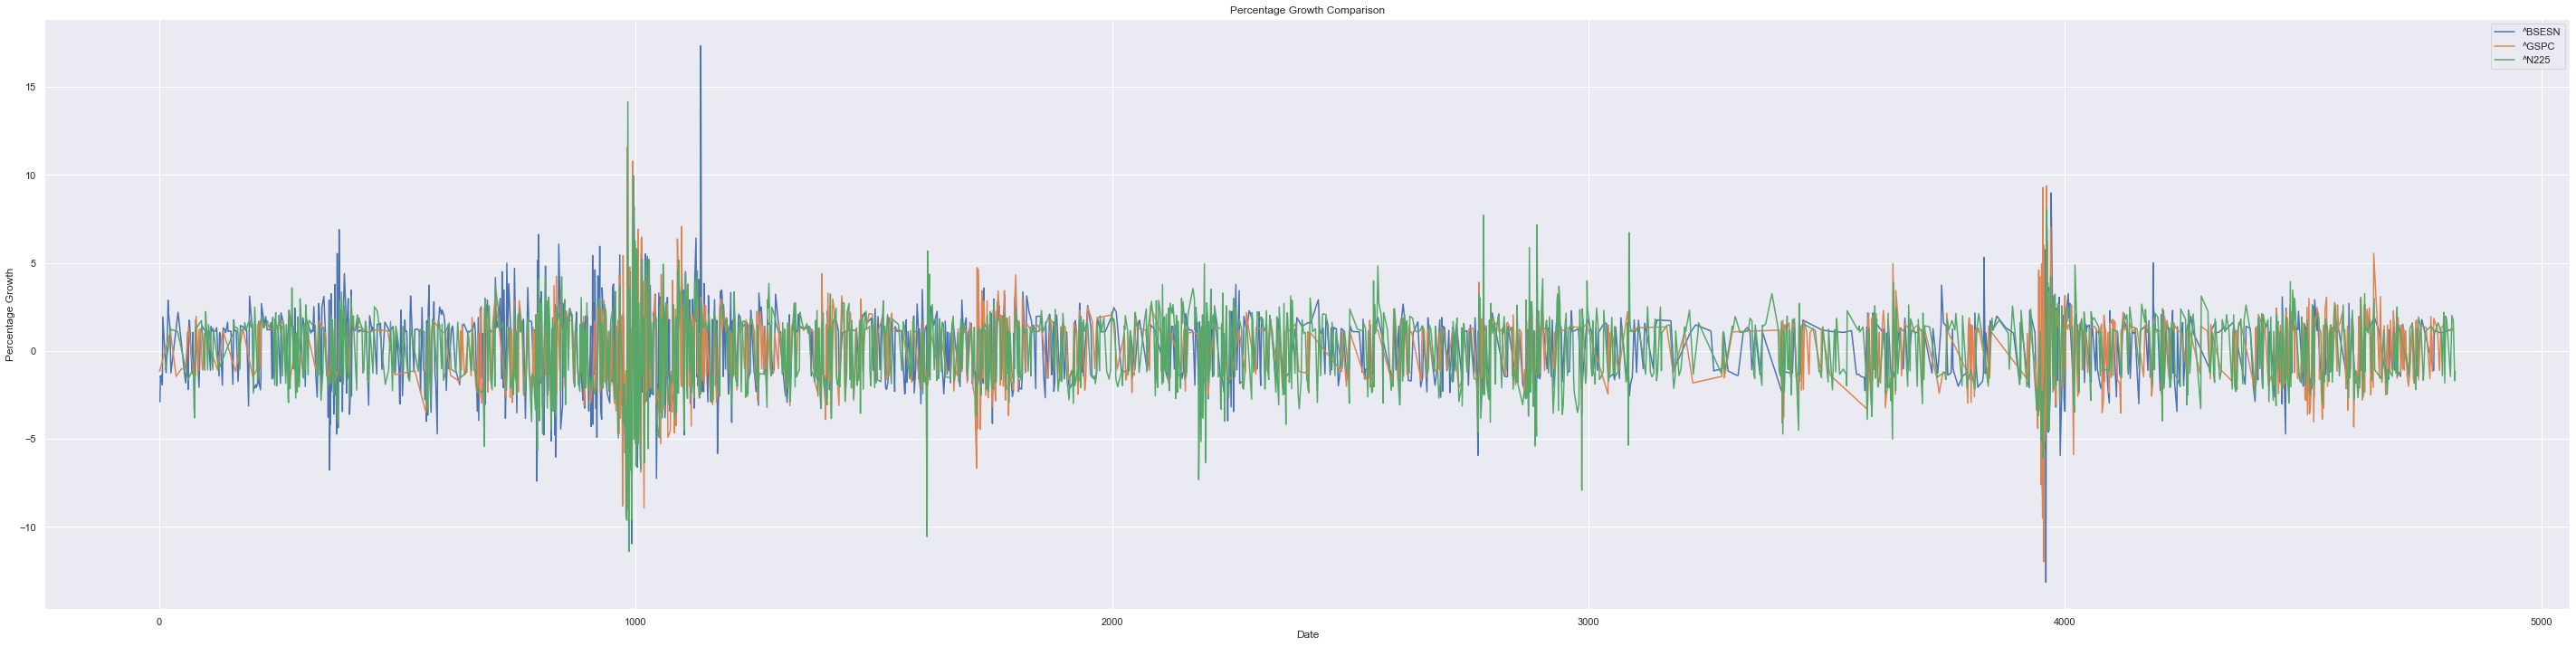

In [9]:
plt.figure(figsize=(50, 12))
for ticker in tickers:
    growth = percentage_growth[ticker]
    x = np.arange(len(growth))
    y = growth

    # Identifying indices where growth is above 1 or less than -1
    mask = np.logical_or(growth > 1, growth < -1)

    # Plotting bar graph for all data points
    plt.plot(x[mask], y[mask], label=ticker)

    # Highlighting bars for significant growth
    #plt.bar(x[mask], y[mask], color='red')

plt.title('Percentage Growth Comparison')
plt.xlabel('Date')
plt.ylabel('Percentage Growth')
plt.legend()
plt.show()

